# Palmer Penguins Modeling
# Author: David Greco
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [5]:
#importing everything used

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import numpy as np

In [6]:
penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [7]:
warnings.simplefilter(action='ignore', category=FutureWarning)

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def build_pipeline(num_vars, cat_vars):
    num_transform = Pipeline([
        ("impute", SimpleImputer(strategy="mean")),
        ("scalar", StandardScaler())
    ])
    cat_transform = Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("dummy", OneHotEncoder())
    ])

    ct = ColumnTransformer([
        ('num', num_transform, num_vars),
        ("cat", cat_transform, cat_vars)
    ])

    pipeline = Pipeline([
        ("preprocessor", ct),
        ("regressor", LinearRegression())
    ])

    return pipeline

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

c:\Users\elect\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\elect\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


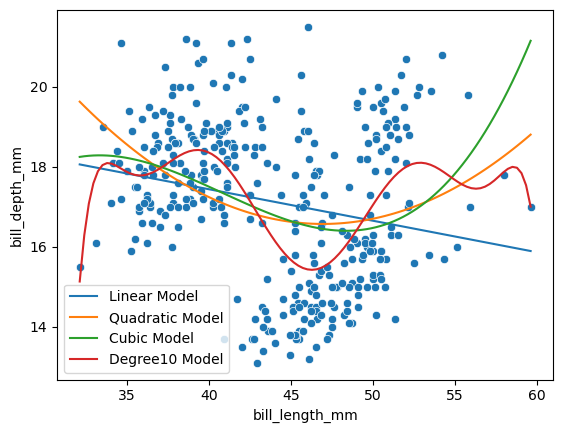

In [8]:
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Linear": Pipeline([
        ("scalar", StandardScaler()),
        ("linear", LinearRegression())
    ]),
    "Quadratic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("linear", LinearRegression())
    ]),
    "Cubic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=3)),
        ("linear", LinearRegression())
    ]),
    "Degree10": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=10)),
        ("linear", LinearRegression())
    ])
}

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins)
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_plot = model.predict(x_plot)
    sns.lineplot(x=x_plot.squeeze(), y=y_plot, label=f'{name} Model')

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
Seems like none of the models are underfitting
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell? The red line showing the Degree 10 Model is overfitting the data. This is shown by the changes in concavity and the large amounts of us and downs. 
* Which of the above models do you think fits the data best and why? The best fit I wold think is the cubic. This is because it shares the most amount of data points and a similar curve with the penguin data. 